### Import Libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Load Dataset

In [18]:
from sklearn.datasets import load_diabetes

In [171]:
df=load_diabetes()
x=pd.DataFrame(df['data'],columns=df['feature_names'])
y=pd.DataFrame(df['target'],columns=['target'])
df=pd.concat((x,y),join='outer',axis=1)
df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


### Linear Assumptions

1. Linear Relation with Target (Dropping the column which is not linear with our target variable.)
2. Multi-collinearity (Making sure that features are not co-related within themselves)
3. Homoscedasticity.
4. Normality of residuals (Residuals should be normally distributed)
5. Auto-corelation.

<!-- checking linear relation of target and features -->

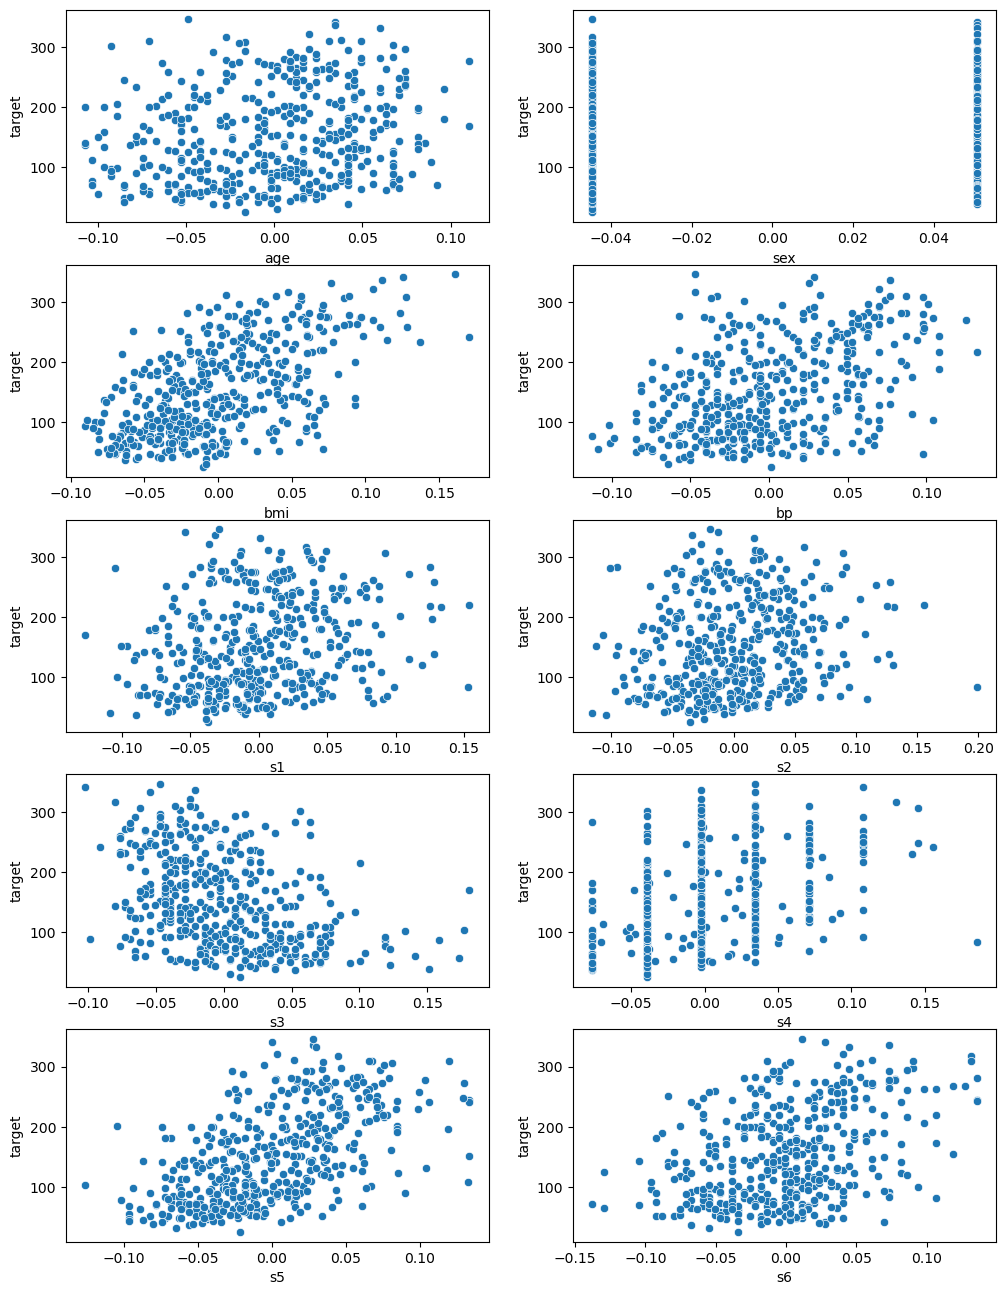

In [187]:
fig,ax=plt.subplots(5,2,figsize=(12,16))
ax=ax.flatten()
for e,i in enumerate (df.columns[:-1]):
    sns.scatterplot(x=df[i],y=df.iloc[:,-1],ax=ax[e])
    

    plt.xlabel(i)
    plt.tight_layout

In [190]:
# Multi-collinearity

<Axes: >

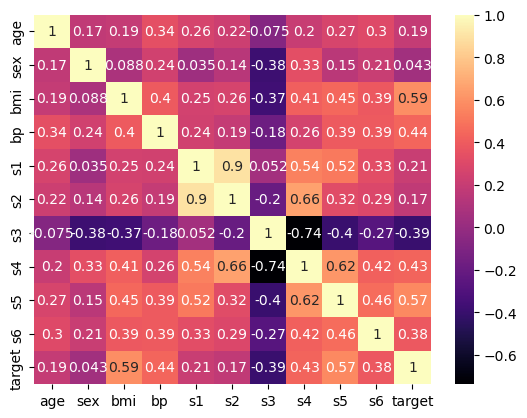

In [194]:
sns.heatmap(df.corr(),annot=True,fmt='.2g',cmap='magma')

In [197]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)

<!-- fitting and predicting -->

In [267]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
res=y_test-y_pred

In [ ]:
# Homoscedasticity: the residuals should be even on both sides of the line.

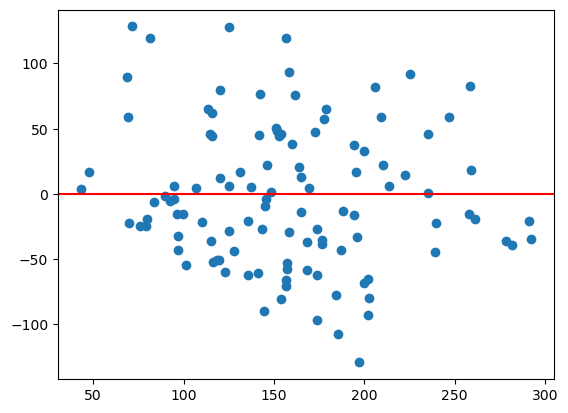

In [265]:
plt.scatter(y_pred,res)
plt.axhline(y=0,color='red')

In [ ]:
# Normality of residuals.

<Axes: ylabel='Density'>

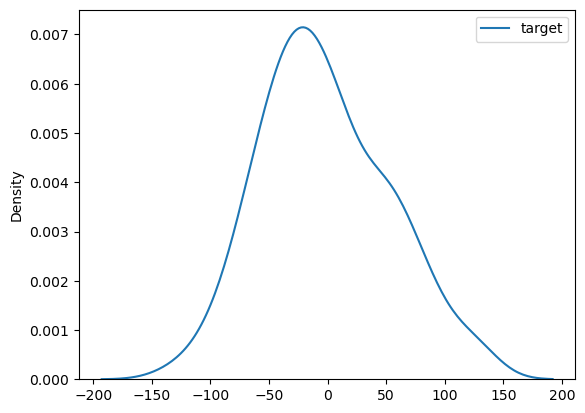

In [270]:
sns.kdeplot(res)

In [276]:
 # Auto-corelation: There should not be any pattern

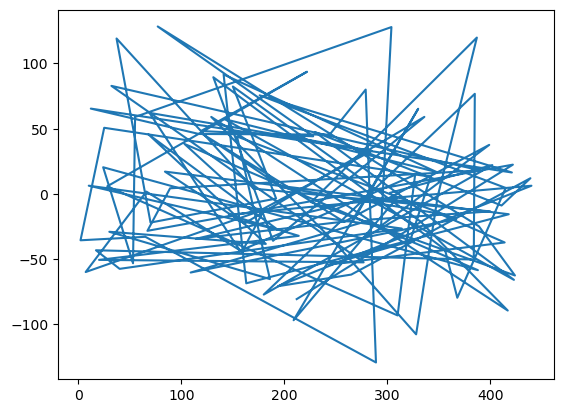

In [273]:
plt.plot(res)